In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from acquire import get_telco_data
from prepare import prep_telco
from prepare import split

In [2]:
df = get_telco_data()


In [3]:
df.head()


,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,2,1,1,1,0015-UOCOJ,Female,1,No,No,7,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,3,1,1,1,0023-HGHWL,Male,1,No,No,1,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [4]:
df = prep_telco(df)

In [5]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,no_phone_service,multiple_lines,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
0,0,9,59.9,542.40,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,True,False
1,0,9,69.4,571.45,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,False,False
2,1,7,48.2,340.35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,True,False
3,1,1,25.1,25.10,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,True,True
4,0,1,30.5,30.50,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,False,True


In [6]:
train, validate, test = split(df)

In [7]:
train. head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,no_phone_service,multiple_lines,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
6058,0,58,19.55,1108.80,1,1,1,1,0,0,...,0,1,0,0,0,1,0,0,False,False
4085,1,17,92.55,1614.70,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,False,False
3497,0,27,94.55,2724.60,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,True,False
4271,1,37,76.25,2841.55,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,True,False
2672,0,7,73.60,520.00,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,True,False


In [8]:
train.shape

(3943, 27)

# Explore the Target

In [9]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churned')

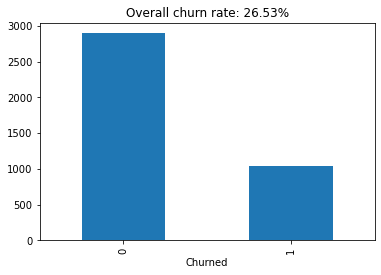

In [10]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')

In [12]:
list(train.columns)

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'male',
 'partner',
 'dependents',
 'phone_service',
 'no_phone_service',
 'multiple_lines',
 'no_internet_service',
 'online_security',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless',
 'churn',
 'one_year',
 'two_year',
 'fiber_optic',
 'credit_card',
 'electric_check',
 'mailed_check',
 'online_backup',
 'live_alone',
 'new_customer']

In [13]:
cat_vars = ['senior_citizen', 'male', 'partner', 'dependents', 'phone_service', 'no_phone_service', 'multiple_lines', 'no_internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless', 'churn', 'one_year', 'two_year', 'fiber_optic', 'credit_card', 'electric_check', 'mailed_check', 'online_backup', 'live_alone', 'new_customer']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']